 ## Want to see customer  purchasing behavior

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("Mall_customers.csv")


In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
# finding no of row and col
data.shape

(200, 5)

In [8]:
# copy real data set 
df = data.copy()

In [9]:
df.shape

(200, 5)

In [10]:
# choosing Anual income and score column 
x = df.iloc[:,[3,4]].values

## Choosing no of Cluster 

#### We will use  Wcss( within cluster sum of squares) call elbow method
#### Try to find how much cluster will be the best for that data set. using elbow method 

In [16]:
## finding teh cluster 
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i,init= 'k-means++',random_state= 42)
    kmeans.fit(x)
    
    wcss.append(kmeans.inertia_) ## will give wscc value for each cluster

C:\Users\khush\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


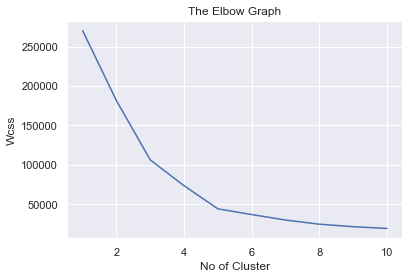

In [17]:
## finding elbow graph to see which cluster has minimum value 
sns.set()
plt.plot(range(1,11),wcss)
plt.title("The Elbow Graph")
plt.xlabel("No of Cluster")
plt.ylabel("Wcss")
plt.show()

* Optimum no of Cluster will be 5 based on above fig

### Training k_means cluster Model 

In [24]:
kmeans = KMeans(n_clusters =5,init="k-means++",random_state=0)


#### Return the label based on there cluster 

In [25]:
y = kmeans.fit_predict(x)
y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

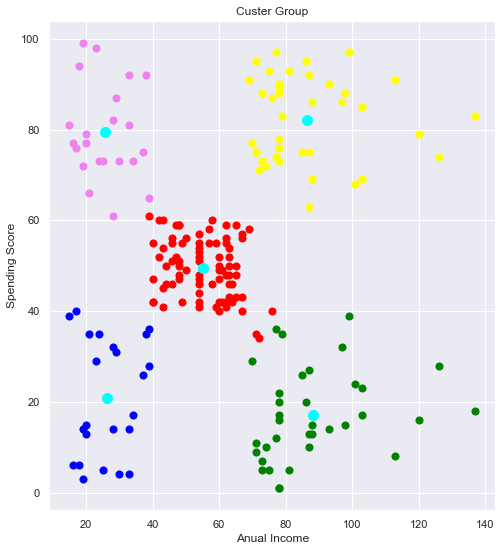

In [28]:
## plot cluster along with their value 
plt.figure(figsize = (8,9))
plt.scatter(x[y==0,0],x[y==0,1],s= 50,c="green",label ="Cluster 1")
plt.scatter(x[y==1,0],x[y==1,1],s= 50,c="red",label ="Cluster 2")
plt.scatter(x[y==2,0],x[y==2,1],s= 50,c="yellow",label ="Cluster 3")
plt.scatter(x[y==3,0],x[y==3,1],s= 50,c="violet",label ="Cluster 4")
plt.scatter(x[y==4,0],x[y==4,1],s= 50,c="blue",label ="Cluster 5")


# plot centroid 
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100,c='cyan',label = "Centroid")
plt.title("Custer Group")
plt.xlabel("Anual Income")
plt.ylabel("Spending Score")
plt.show()